# Objectgericht programmeren


Objectgericht programmeren (OGP) is een programmer paradigma waarbij **objecten** centraal staan de uitbouw van een systeem. De klasse (keywoord: `class`) bevat instructies **hoe een object eruit ziet** en **wat een object kan doen**. De klasse wordt gedefinieerd aan de hand van de **attributen** (uitzicht) en de **methodes** (functionaliteit). Objecten zijn instanties (verwezelijking) van een klasse.

Hieronder geven we het stereotype voorbeeld: de klasse voor een Auto. Geef aandacht hoe de syntax voor een klasse gedefinieerd is in python.

In [1]:
class Auto(): # SYNTAX: Let op de hoofdletters bij klasnamen
    """
        De klasse Auto 
    """
    def __init__(self, model, aantal_passagiers, kleur):
        """
        De constructor van de klasse Auto. 
        Deze functie word opgeroepen bij het initialiseren van een klasse Auto (zie lijnen 23 en 24).
        In de constructor wordt gedefinieerd welke attributen de klasse heeft en worden deze geinitialiseerd.
        """
        self._model = model # SYNTAX: Let op het feit dat attribuut namen starten met een underscore ('_')
        self._aantal_passagiers = aantal_passagiers
        self._kleur = kleur

    def print_info(self):
        output_str = f"Model:\t\t{self._model}\n"
        output_str += f"Zitplaatsen:\t{self._aantal_passagiers}\n"
        output_str += f"Kleur:\t\t{self._kleur}\n"
        print(output_str)
        
if __name__ == '__main__':

    tesla = Auto("Tesla", 4, "red")
    ferrari = Auto("Ferrari", 2, "black")
    
    tesla.print_info()
    ferrari.print_info()


Model:		Tesla
Zitplaatsen:	4
Kleur:		red

Model:		Ferrari
Zitplaatsen:	2
Kleur:		black



## Encapsuleren

Het eerste belangrijke concept binnen OGP is **encapsuleren**. De term slaat op het feit dat de **data** (binnen OGP praat men over **attributen** of **properties**) en de **functies** (binnen OGP praat men over **methoden**) die in werken op de data bevat worden binnen hetzelfde object. Zo wordt de interne staat van het object afgeschermd, en kan van buitenaf enkel via de functies geinterageerd worden met deze staat.

## Oefening 1

Breid de functionaliteit van de klasse Auto uit. Elke auto heeft een bepaald verbruik, gemeten in liter per 100km, en bevat een hoeveelheid brandstof. Bij constructie van een object, de brandstoftank is initieel leeg. Voorzie een methode die een rit simuleert. Deze methode past de tankinhoud aan, gegeven de afstand die afgelegd wordt. Voorzie ook een methode die de resterende tankinhoud teruggeeft, en een methode die brandstof bijtankt.

In [10]:
class Auto(): # SYNTAX: Let op de hoofdletters bij klasnamen
    """
        De klasse Auto 
    """
    def __init__(self, merk, aantal_passagiers, kleur, verbruik, tankinhoud=0):
        """
        De constructor van de klasse Auto. 
        Deze functie word opgeroepen bij het initialiseren van een klasse Auto.
        In de constructor wordt gedefinieerd welke attributen de klasse heeft en worden deze geinitialiseerd.
        """
        self._merk = merk
        self._aantal_passagiers = aantal_passagiers
        self._kleur = kleur
        self._verbruik = verbruik
        self._tankinhoud = tankinhoud

    def print_info(self):
        output_str = f"Merk:\t\t{self._merk}\n"
        output_str += f"Zitplaatsen:\t{self._aantal_passagiers}\n"
        output_str += f"Kleur:\t\t{self._kleur}\n"
        print(output_str)

    def tank(self, liters: int):
        # Als de input datatype verkeerd is
        assert isinstance(liters, int), "Wrong datatype for liters"
        self._tankinhoud = liters

    def rij(self, kilometers):
        if self._tankinhoud >= kilometers/100 * self._verbruik:
            self._tankinhoud -= (self._verbruik / 100) * kilometers
        else:
            mogelijke_afstand = self._tankinhoud/self._verbruik*100
            print(f"Te weinig brandstof. Max afstand die we kunnen afleggen: {mogelijke_afstand}")
            self._tankinhoud = 0

    # We kunnen ook zeggen wat voor type we returnen
    def get_tankinhoud(self) -> float:
        print(f"De nieuwe tankinhoud is {self._tankinhoud:>.2f} liter")
        
if __name__ == '__main__':

    ferrari = Auto("Ferrari", 2, "black", 30)
    ferrari.tank(10)                 # tank 40 liter
    ferrari.rij(50)                  # rij 50km
    print(ferrari.get_tankinhoud())   # print resterende inhoud
    ferrari.print_info()


Te weinig brandstof. Max afstand die we kunnen afleggen: 33.33333333333333
De nieuwe tankinhoud is 0.00 liter
None
Merk:		Ferrari
Zitplaatsen:	2
Kleur:		black



## Overerven

Het tweede belangrijke concept in OGP, die we behandelen binnen BVP, is **overerving**. Een klasse kan van een andere klasse attributen en methodes overerven. Wanneer twee of meerdere klassen **gelijkaardig zijn**, kan het gemeenschappelijke deel gegroepeerd worden binnen een superklasse. De klassen erven dan deze gemeenschappelijke delen, en kunnen dit op dezelfde manier gebruiken als mochten de attributen of methodes in de klasse zelf gedefinieerd worden.

Als voorbeeld gaan we verder met de auto. Stel je voor dat we naast een auto, ook een fiets en een traktor willen modeleren. Deze drie klassen zouden veel zaken gemeenschappelijk hebben. Om het voorbeeld bevattelijk te houden, houden we het aantal attributen en methoden beperkt.

Voor we starten met de implementatie maken we eerst een schets hoe de code eruit zou moeten zien. Dit doen we met behulp van een klassendiagramma.

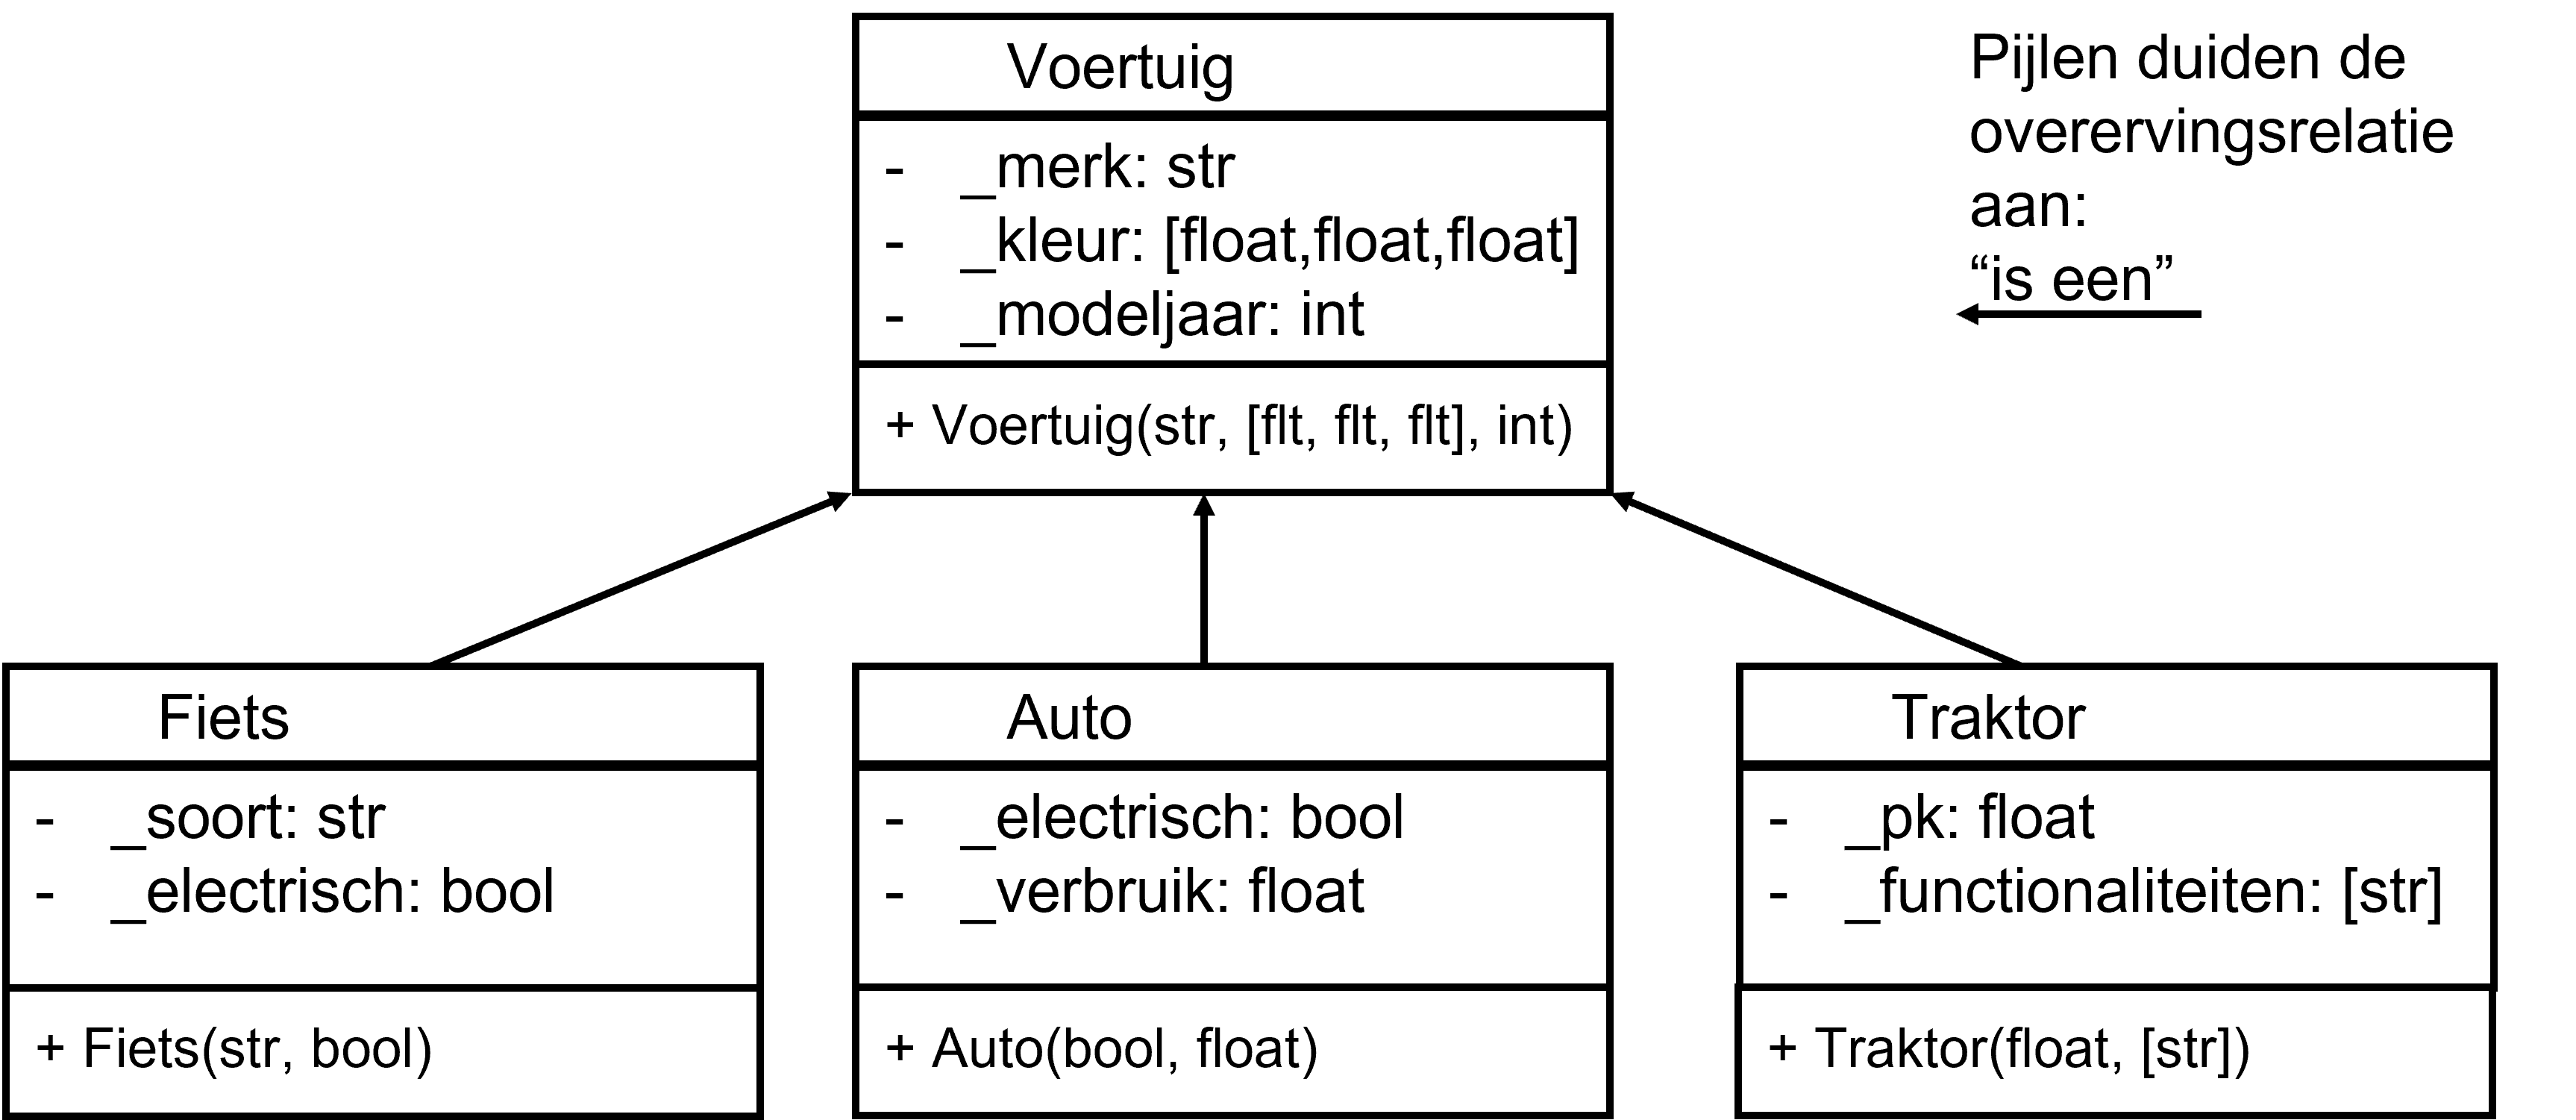

In [ ]:
class Voertuig():
    def __init__(self, merk, kleur, modeljaar):
        self._merk = merk
        self._kleur = kleur
        self._modeljaar = modeljaar
    
    def get_kleur(self):
        return list(self._kleur)
    
    def set_kleur(self, nieuwe_kleur):
        self._kleur = nieuwe_kleur
    
    
class Fiets(Voertuig): # Binnen de haakjes geef je aan van welke klasse wordt overgeerft.
    def __init__(self, merk, kleur, modeljaar, soort, electrisch):
        super().__init__(merk, kleur, modeljaar)
        self._soort = soort
        self._electrisch = electrisch

    
class Auto(Voertuig): # Binnen de haakjes geef je aan van welke klasse wordt overgeerft.
    def __init__(self, merk, kleur, modeljaar, electrisch, verbruik):
        super().__init__(merk, kleur, modeljaar)
        self._electrisch = electrisch
        self._verbruik = verbruik

    
class Traktor(Voertuig): # Binnen de haakjes geef je aan van welke klasse wordt overgeerft.
    def __init__(self, merk, kleur, modeljaar, pk, functionaliteiten):
        super().__init__(merk, kleur, modeljaar)
        self._pk = pk
        self._functionaliteiten = functionaliteiten

# Oefening 2

We wensen onze code van de klasse Auto (zie oefening 1) te moderniseren. Intussen zijn er twee grote groepen van autos, de electrische autos en deze met een verbrandingsmotor. Vervolledig de code hieronder zo optimaal mogelijk. Gebruik de concepten die we hierboven bespraken op een correcte manier. Zorg ervoor dat alle functionaliteiten die in de *main* gegeven wordt, ook daadwerkelijk uitgevoerd kunnen worden.

In [ ]:
class Auto():
    def __init__(self, merk, verbruik, kleur):
        self._merk = merk
        self._verbruik = verbruik
        self._kleur = kleur
    
class ElectrischeAuto(Auto):
    def __init__(self, merk, verbruik, kleur, batterijNiveau):
        super().init(merk, verbruik, kleur)
        self._batterijNiveau = batterijNiveau
    
    def opladen(self, uren):
        self._batterijNiveau += uren

    def get_batterij_niveau(self):
        return self._batterijNiveau

class VerbrandingsmotorAuto(Auto):
    def __init__(self, merk, verbruik, kleur, brandstof=0):
        super().init(merk, verbruik, kleur)
        self._brandstof = brandstof
    
    def tank(self, liters):
        self._brandstof += liters

if __name__ == '__main__':

    tesla = ElectrischeAuto("Tesla", 4, "black", 5)
    tesla.opladen(3)                     # laad 3 uur op. Het opladen gebeurd linear met een vaste oplaadsnelheid.
    tesla.rij(50)                        # rij 50km
    print(tesla.get_batterij_niveau())   # print het huidig batterij niveau
    print(tesla.get_bereik())            # print het resterende bereik van de wagen.
    
    ferrari = VerbrandingsmotorAuto("Ferrari", 2, "black")
    ferrari.tank(40)                  # tank 40 liter
    ferrari.rij(50)                   # rij 50km
    print(ferrari.get_tankinhoud())   # print resterende inhoud